# Project 6: ReneWind

By:  Glen A. Patterson

Date:  07/10/2023

## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

sns.set()

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build the Logistic regression_model
from sklearn.linear_model import LogisticRegression

# To check model performance
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# To build and visualize the Decision Tree_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To impute missing values
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# to create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Hyperparameter Tuning of the Decision Tree to build a better model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To build the Bagging and RandomForest models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# To build the boosting models AdaBoost, GradientBoosting, and Stacking
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# To build the XGBoost model
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
# Load the Train csv file and call the dataframe "data"
data = pd.read_csv("Train.csv.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original Train dataframe "data" and call it "df".  We will be modifying this dataframe
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
# Load the Train csv file and call the dataframe "test_df"
test_df = pd.read_csv("Test.csv.csv")

<IPython.core.display.Javascript object>

In [5]:
# Observing a sample of 10 random rows of the Training dataset to make sure it loaded correctly and examine the data.
df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
6826,-0.693,-1.979,1.610,3.390,-1.714,-1.595,-3.403,0.040,1.441,-0.425,-1.865,-1.261,2.146,-0.437,-5.471,-5.045,1.173,1.359,2.638,3.700,-6.546,2.167,0.596,2.617,-0.992,-0.512,-4.132,-0.115,0.458,4.847,-1.933,4.903,2.826,-1.426,7.127,-2.182,-0.760,-3.718,-1.365,-3.814,0
19365,-0.010,0.573,6.440,-1.838,1.589,-2.245,-0.309,0.092,-1.268,2.175,-5.781,1.366,1.060,0.278,0.124,-1.154,-0.896,0.639,-0.332,-0.662,-1.835,-1.003,-3.314,0.834,2.421,3.849,2.730,-1.994,-4.815,-6.224,7.292,-0.337,-3.383,0.269,-0.380,8.174,-0.533,-2.062,2.910,0.705,0
6326,-1.947,0.899,4.293,-0.437,0.201,-0.337,0.235,-0.971,-1.393,0.918,-0.528,1.542,-0.674,-1.545,1.236,0.246,-0.777,-0.821,1.936,-0.386,0.618,-2.737,-5.133,-1.009,0.578,2.069,0.750,-0.486,0.866,-1.581,2.069,-4.066,0.018,2.424,-0.251,3.092,0.014,1.794,2.259,0.302,0
9886,0.610,-0.969,-0.712,-6.014,0.865,1.432,-0.786,1.573,-1.559,-1.931,1.936,2.725,2.352,-0.316,-2.530,1.219,-2.380,4.290,-5.068,-3.581,-2.055,1.597,3.658,-0.215,-1.303,1.049,-0.885,-3.568,3.109,4.028,2.494,1.939,4.523,-6.134,1.361,2.096,1.550,-2.452,-0.433,4.516,0
15476,0.120,1.733,-1.841,-4.506,1.777,1.335,-0.795,0.932,0.079,-4.721,1.392,3.363,3.084,-1.702,-4.637,-0.808,-0.009,5.151,-5.684,-3.443,-3.298,2.552,5.574,0.202,-2.118,3.162,-3.967,-3.468,3.371,4.471,-0.673,1.529,4.386,-7.583,0.435,-0.691,2.431,-1.358,-0.875,4.769,0
17819,2.809,0.263,2.440,-4.654,-0.282,1.560,0.559,-3.709,0.790,1.727,0.726,-0.850,2.823,0.281,-0.422,-2.630,-5.508,0.888,-1.966,-3.982,-1.846,0.239,-3.116,-3.841,1.523,2.453,6.898,-2.436,-2.145,-4.152,2.436,-4.882,-0.686,-0.672,-1.506,4.046,-0.550,1.599,2.512,0.679,0
215,-1.015,-1.034,3.838,-2.416,-0.467,-0.751,-1.195,0.309,-0.542,-0.397,-0.803,2.144,2.836,-0.600,-2.293,-0.713,-1.520,1.447,-0.665,0.598,-2.665,-0.770,-2.129,-2.309,0.399,1.560,0.388,-2.450,0.991,0.656,1.891,-2.334,0.785,-0.714,1.473,3.828,1.048,-2.711,1.740,0.989,0
1215,2.178,1.791,6.776,3.067,-1.849,-3.745,-0.593,-0.435,0.762,0.395,-4.692,2.742,1.303,-2.066,-1.381,-6.006,1.927,-1.513,6.262,2.577,-7.210,1.221,-3.207,1.508,2.042,2.886,0.135,-0.022,-3.155,-2.189,0.482,-2.110,-3.855,2.510,5.297,1.191,-1.088,-1.076,0.823,-3.112,0
6227,5.479,1.302,5.458,1.672,-3.936,-1.315,-1.220,-4.811,4.493,0.301,-0.318,-1.575,5.935,-1.399,-4.787,-9.787,-3.790,-1.727,4.597,0.360,-10.498,2.496,-4.351,-3.755,1.555,3.704,4.456,-1.850,-2.537,-1.186,-2.598,-4.607,-1.179,0.641,6.286,-1.891,-2.247,-0.684,0.672,-5.320,0
14972,-2.233,0.398,2.094,4.412,0.032,-1.456,-2.591,-1.234,0.446,0.638,-2.598,-0.805,0.700,-1.379,-4.723,-5.119,0.948,0.807,3.987,1.169,-5.293,1.433,-0.182,5.475,-1.823,2.011,-4.745,0.526,-0.775,2.857,-0.727,6.226,3.167,-0.466,6.126,-1.707,-1.728,0.260,-0.423,-4.722,0


<IPython.core.display.Javascript object>

In [6]:
# Observing a sample of 10 random rows of the Test dataset to make sure it loaded correctly and examine the data.
test_df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
2456,-2.110,5.015,1.101,1.261,3.614,-2.428,-0.593,2.642,-0.630,-4.007,-3.146,4.857,2.660,-2.381,-5.021,-0.516,2.723,2.023,-1.332,-2.601,-4.112,1.512,5.631,5.526,-2.945,7.438,-8.083,-2.526,-0.220,1.922,1.983,7.523,2.461,-5.459,2.189,-0.559,0.511,-1.385,-0.776,1.037,0
982,-4.574,-0.300,2.697,1.708,0.807,-1.686,-2.136,-0.401,-0.045,0.210,-2.919,1.326,3.014,-0.556,-5.020,-2.253,-0.049,1.406,1.266,1.801,-2.835,-0.438,-0.670,1.486,-1.412,2.473,-3.173,-0.894,-1.080,0.648,0.047,2.584,1.130,0.494,1.790,2.455,0.379,-1.185,2.074,-2.889,0
58,5.843,2.295,5.916,-2.724,-1.331,-0.080,0.515,-3.982,1.934,1.225,-0.381,-0.849,3.681,-0.922,-0.738,-5.376,-5.248,-1.059,0.694,-3.983,-6.027,0.733,-4.928,-3.581,2.424,5.241,6.953,-3.140,-2.919,-4.732,3.481,-5.181,-1.357,-0.953,2.141,2.733,-2.097,0.496,1.644,-0.613,0
862,-3.920,-1.253,1.719,0.179,1.155,-0.320,-1.346,-0.902,-2.630,2.924,-2.909,1.489,-1.506,-0.608,-1.457,-2.057,-0.099,2.455,2.517,-0.394,-0.923,0.422,-0.707,5.509,-0.925,-0.103,-1.475,0.917,-1.586,0.115,1.812,3.653,1.435,1.372,2.041,3.734,-0.404,2.609,1.940,-1.978,0
4678,-1.604,-4.393,4.381,2.124,-2.013,-5.554,-2.454,4.322,-0.353,1.852,-5.481,3.160,5.733,2.525,-4.626,-0.408,0.131,-0.862,3.226,6.548,-5.387,0.843,1.396,0.206,0.727,-1.029,-0.453,-1.267,-4.486,-0.083,2.351,4.977,-3.915,2.519,4.980,5.148,0.140,-9.223,1.293,-4.790,0
4501,8.390,3.109,12.815,-2.900,-4.153,-0.625,-0.363,-7.939,1.546,3.097,-1.608,1.434,3.478,-4.545,-1.797,-13.906,-6.691,-0.413,7.635,-4.808,-14.076,2.433,-10.905,-2.001,3.941,7.073,9.407,-3.268,-3.026,-4.433,3.151,-10.394,-0.922,1.184,9.221,3.939,-3.530,4.219,3.216,-3.037,0
3246,4.770,1.443,4.817,2.027,-2.474,-2.299,-0.982,-2.274,3.592,-0.252,-2.489,-0.921,4.426,-0.716,-3.501,-7.326,-1.108,-1.420,3.123,1.311,-8.489,2.262,-2.299,-1.904,1.907,3.350,2.548,-1.469,-3.459,-2.137,-0.668,-2.081,-2.668,-0.106,4.763,-0.769,-1.677,-2.521,0.051,-3.603,0
858,3.058,3.581,0.565,2.935,-1.306,0.946,-0.323,-4.644,2.328,-0.907,0.811,-1.070,-0.780,-3.398,-2.155,-8.432,0.569,0.299,4.514,-2.054,-6.245,3.190,-0.963,3.057,-0.641,2.399,-1.218,1.218,0.395,1.828,-4.771,-1.072,2.070,-0.769,4.853,-6.099,-1.836,5.627,-1.346,-2.920,0
1108,-2.518,0.695,2.637,-3.333,1.276,2.357,-3.605,-4.997,2.528,-2.232,0.668,-2.132,6.300,-1.824,-9.198,-6.409,-4.676,5.569,-4.932,-3.053,-6.217,0.541,-2.017,-2.559,-2.127,5.961,-1.695,-4.755,2.333,2.865,-0.254,-0.517,7.307,-6.400,1.867,1.695,0.745,-0.430,2.205,0.306,0
809,-0.573,-1.091,-1.398,-0.943,-2.735,0.275,2.813,1.092,-2.873,0.633,2.968,6.296,-3.967,-1.588,5.581,2.412,2.272,-1.538,5.492,2.056,3.620,-0.540,-0.979,-1.504,0.881,-5.733,2.121,3.472,2.778,1.048,-5.453,-8.966,-3.924,7.141,-1.790,-0.854,2.324,5.194,1.079,0.978,0


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [7]:
# Get information about the number of rows and columns in the dataset (rows, columns)
df.shape

(20000, 41)

<IPython.core.display.Javascript object>

- We can see that there is 20,000 rows and 41 columns in the Training dataset.

In [8]:
# Get information about the number of rows and columns in the dataset (rows, columns)
test_df.shape

(5000, 41)

<IPython.core.display.Javascript object>

- We can see that there is 5,000 rows and 41 columns in the Test dataset.

In [9]:
# See if there is any duplicated rows
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in the Training dataset.

In [10]:
# See if there is any duplicated rows
test_df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in the Test dataset.

In [11]:
# Information on dataset (data types, format, missing data, ect.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

**Training dataset**
- There is missing data in columns "V1" and "V2"
- There is 6.3 MB memory used
- There is forty "float64" and one "int64" data types

In [12]:
# Information on dataset (data types, format, missing data, ect.)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

<IPython.core.display.Javascript object>

**Test dataset:**
- There is missing data in columns "V1" and "V2"
- There is 1.6 MB memory used
- There is forty "float64" and one "int64" data types

In [13]:
# Finding the imbalance in Target for the Training dataset
df["Target"].value_counts(normalize=True)

0   0.945
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

- **There is a large imbalance in Training Target variables (94.5% No failure) and (5.5% failure) from sensors.**

In [14]:
# Finding the imbalance in Target for the Test dataset
test_df["Target"].value_counts(normalize=True)

0   0.944
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

- **There is a large imbalance in Test Target variables (94.4% No failure) and (5.6% failure) from sensors.**

In [15]:
# Explore the Statistics in Training dataset and look for outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

In [16]:
# Explore the Statistics in Test dataset and look for outliers
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

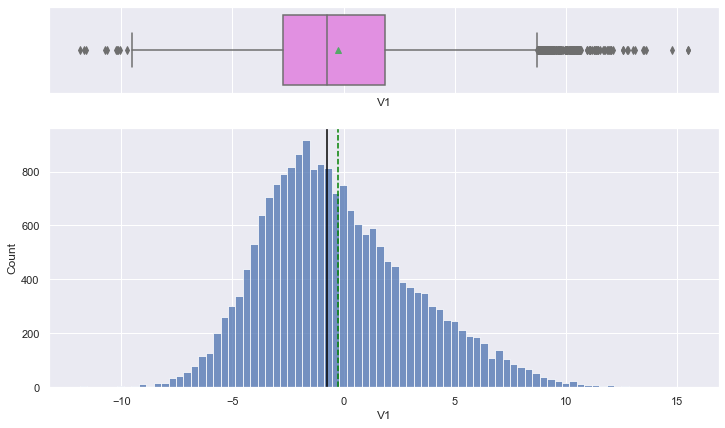

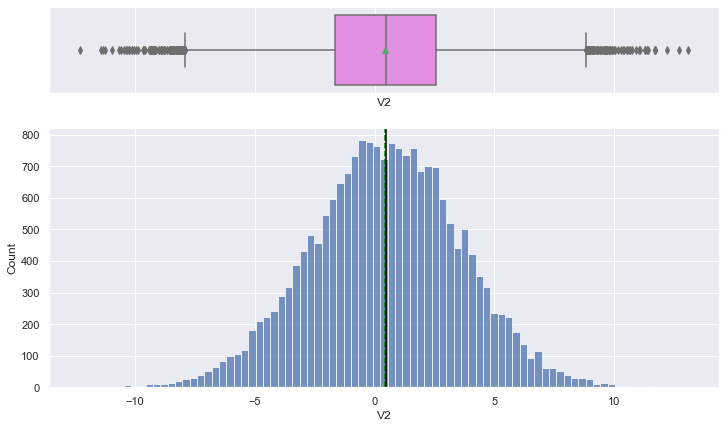

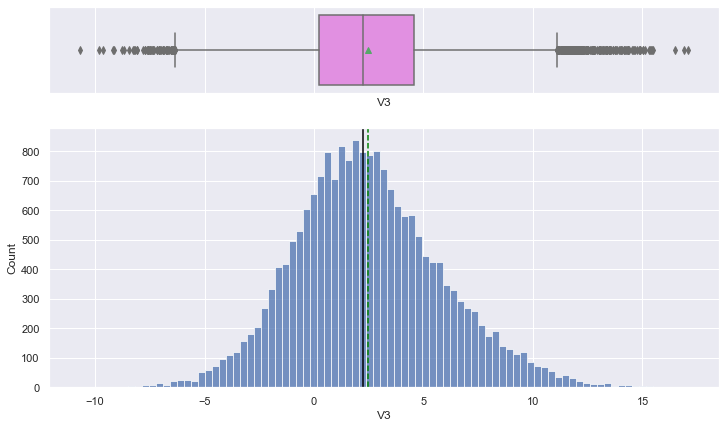

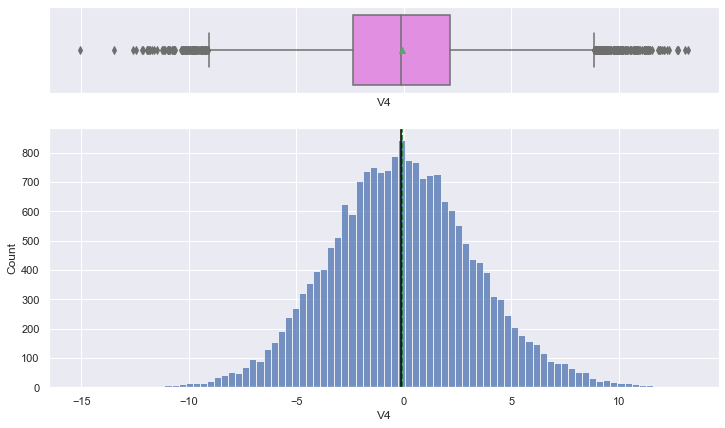

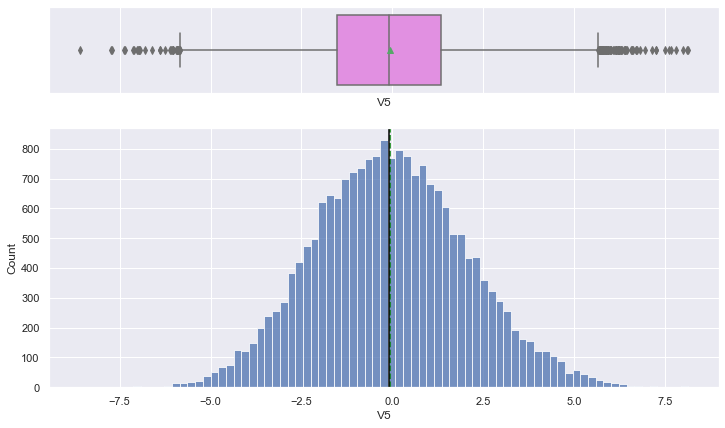

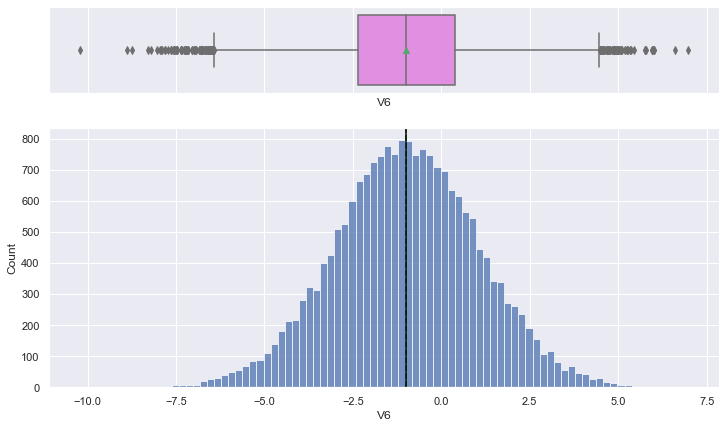

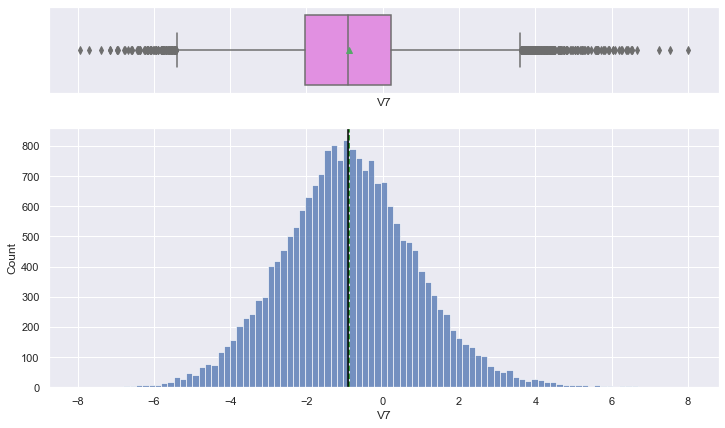

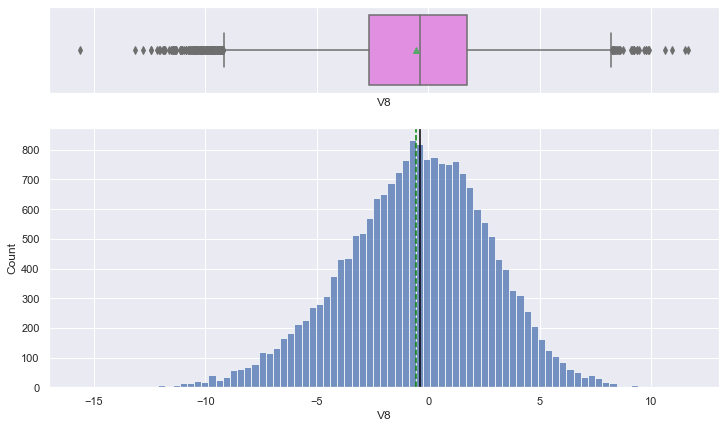

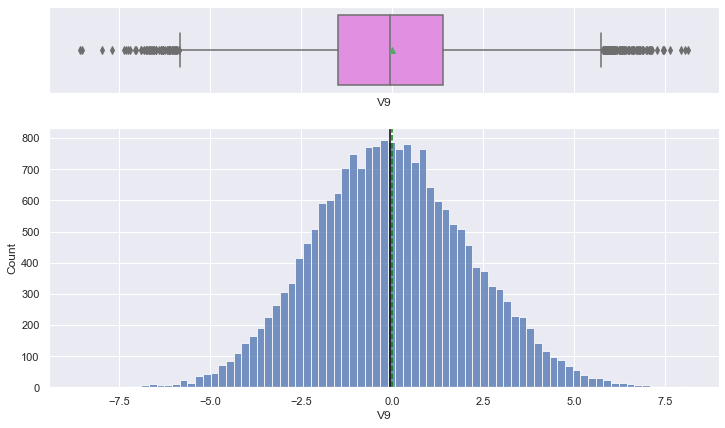

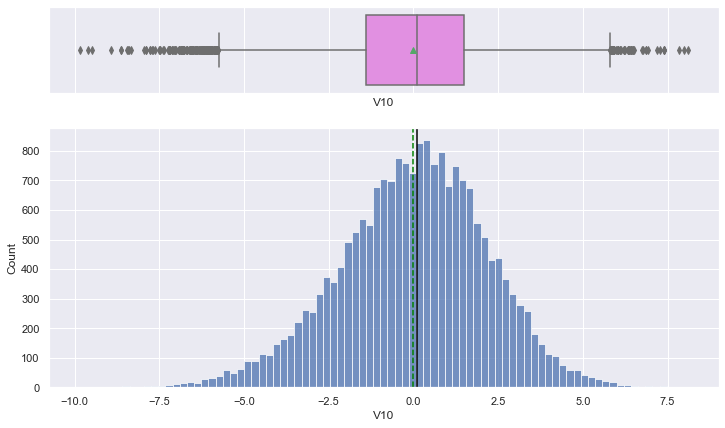

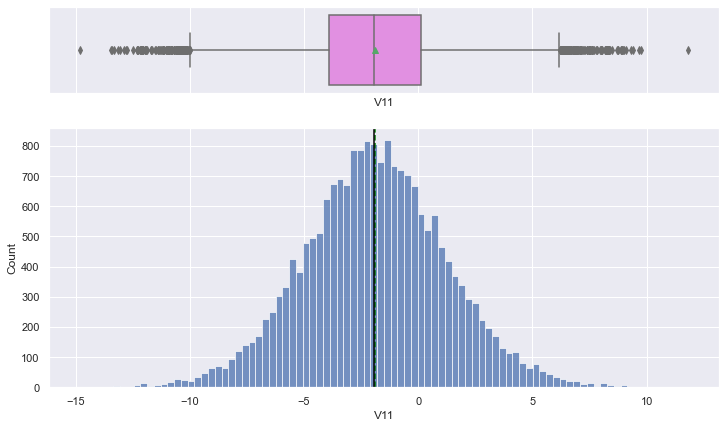

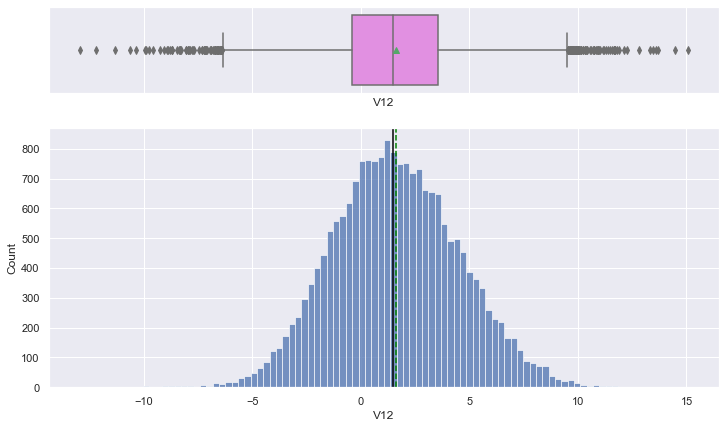

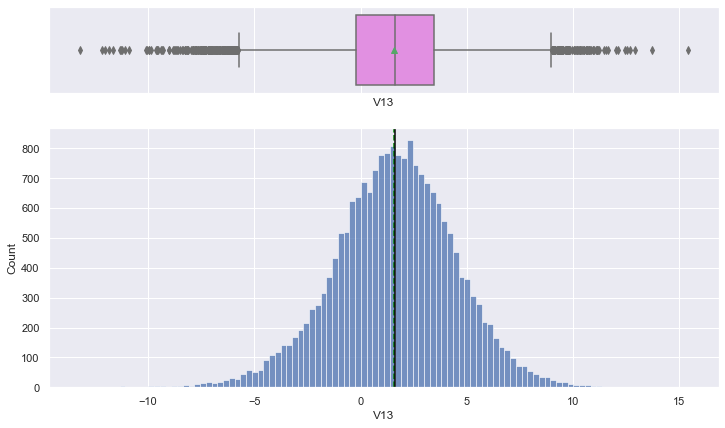

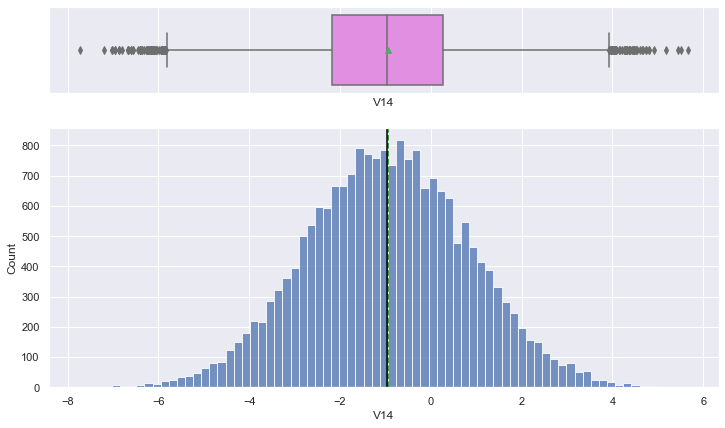

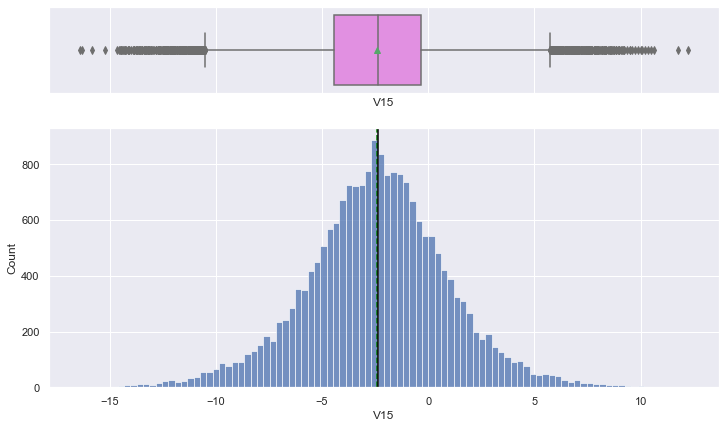

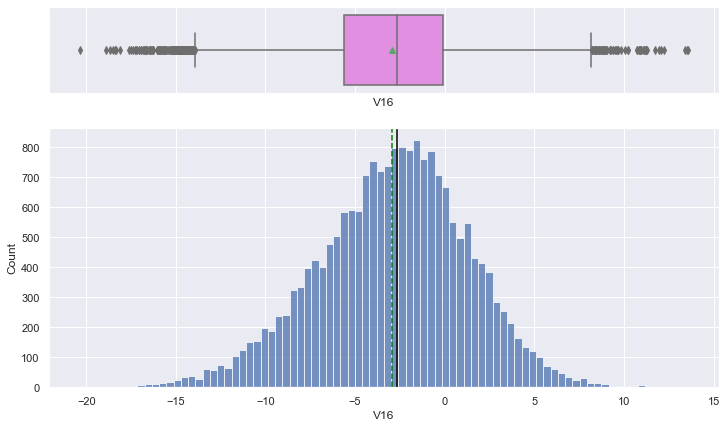

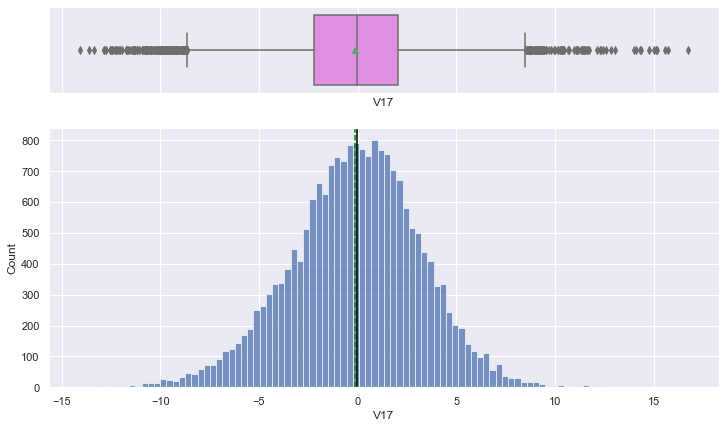

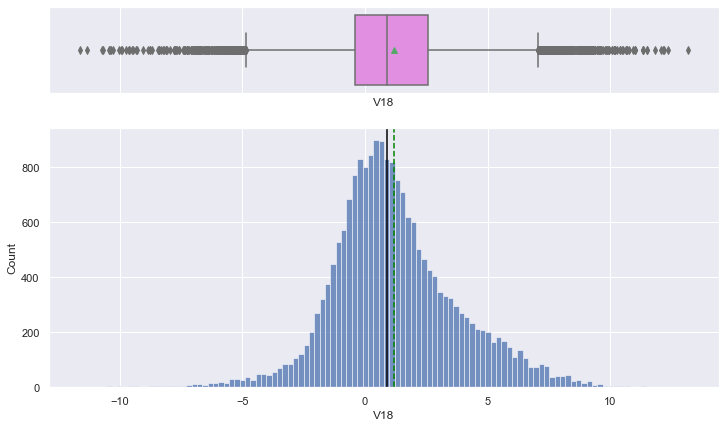

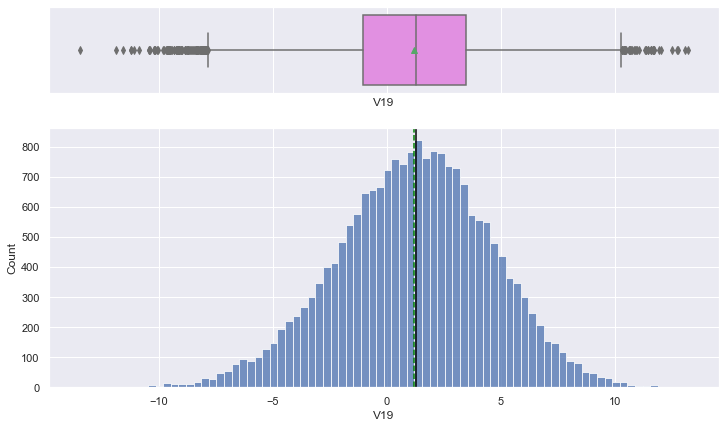

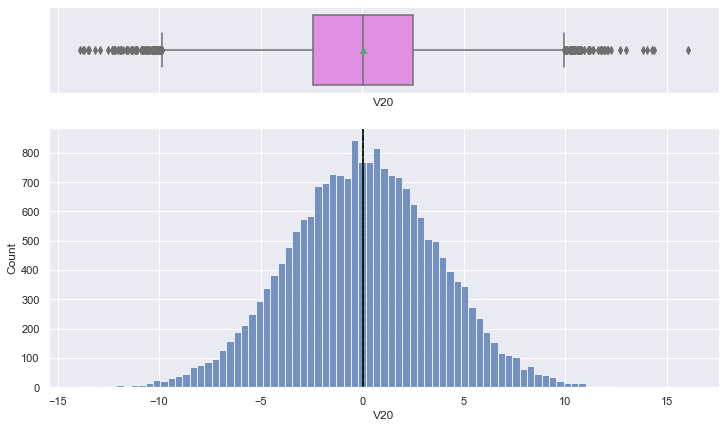

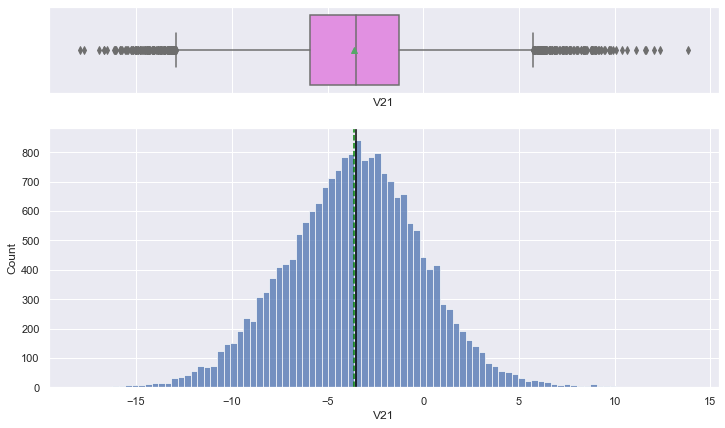

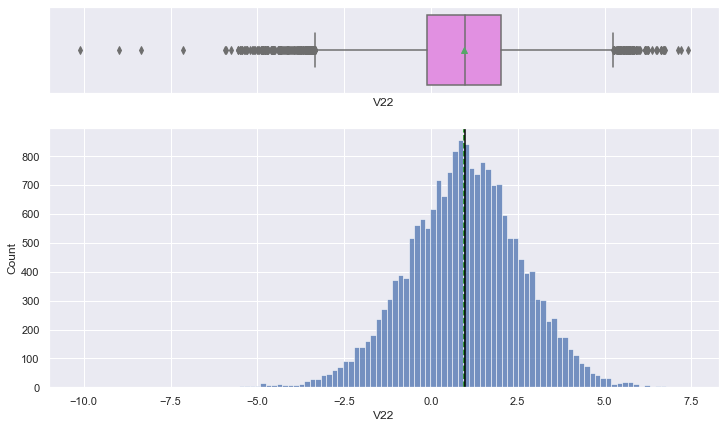

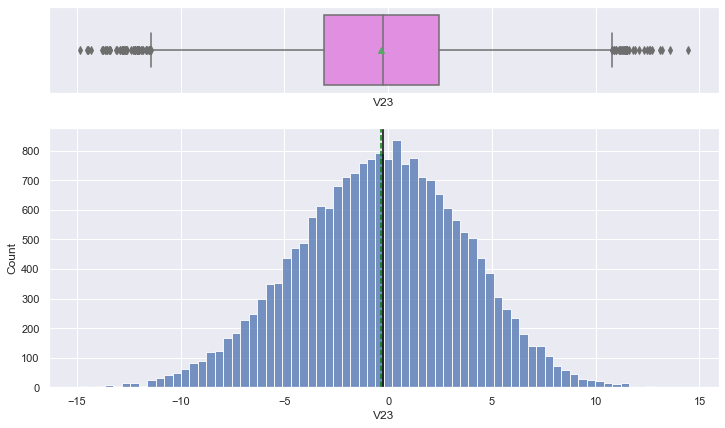

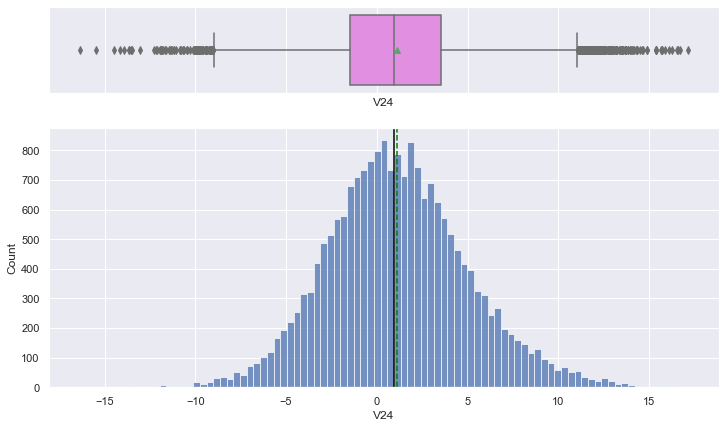

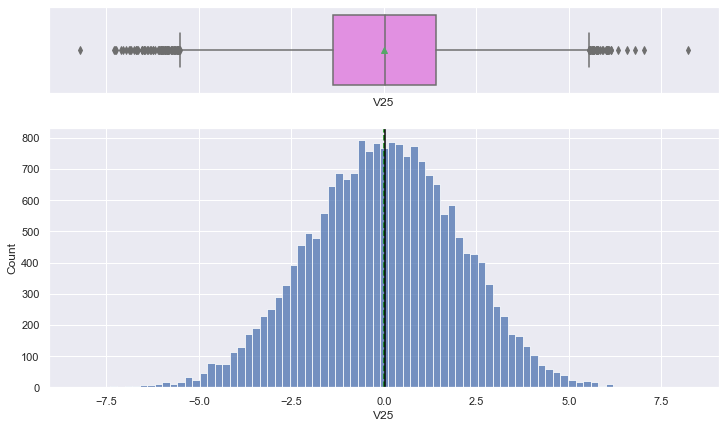

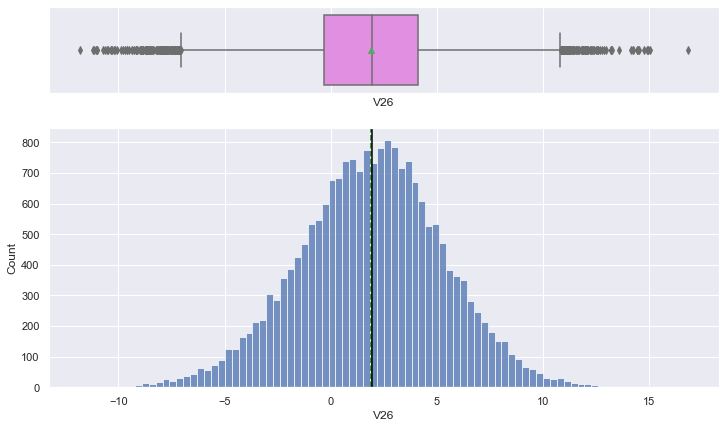

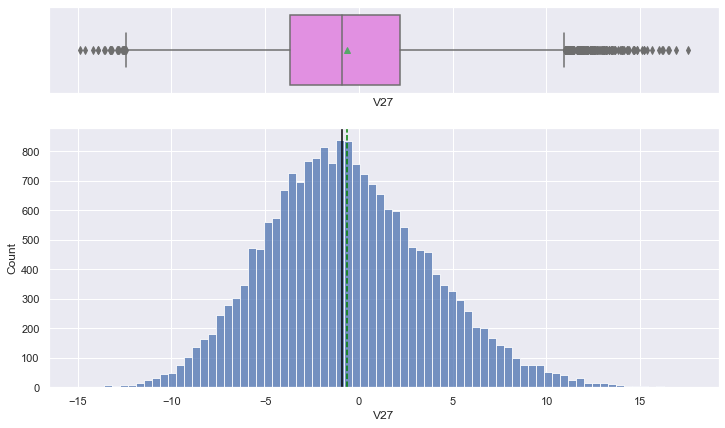

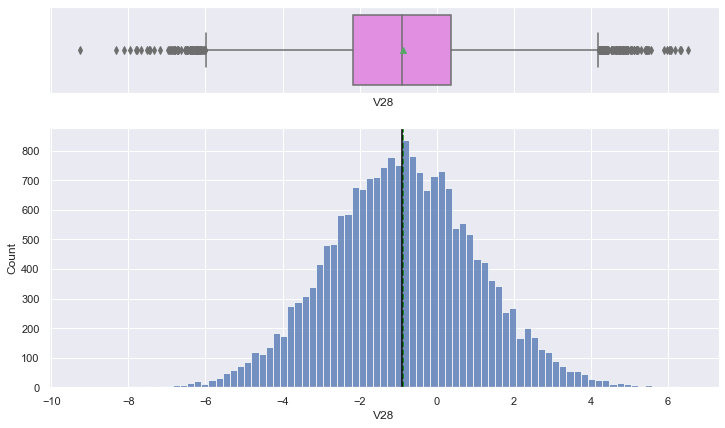

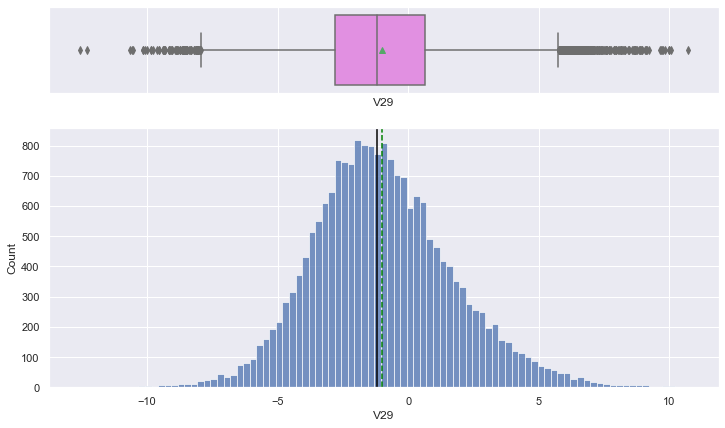

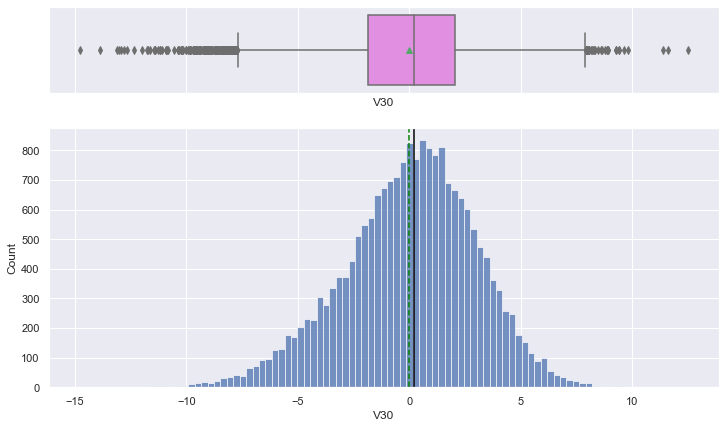

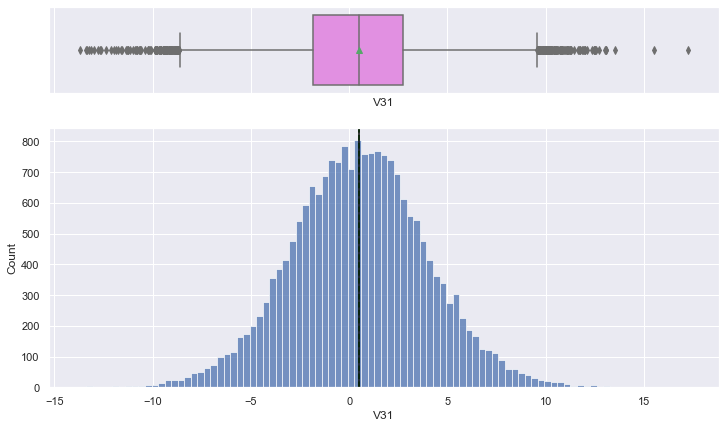

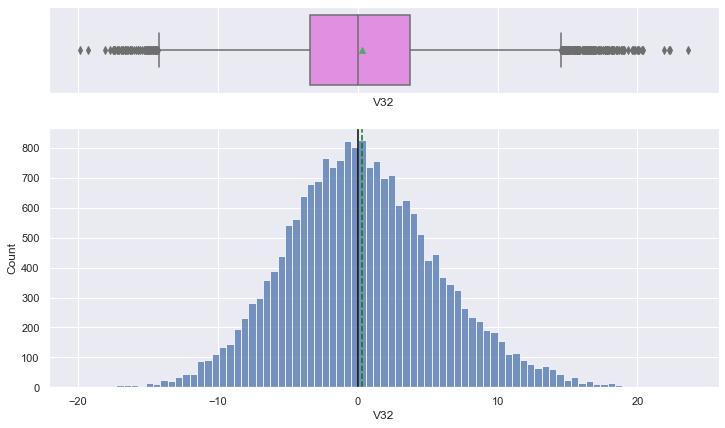

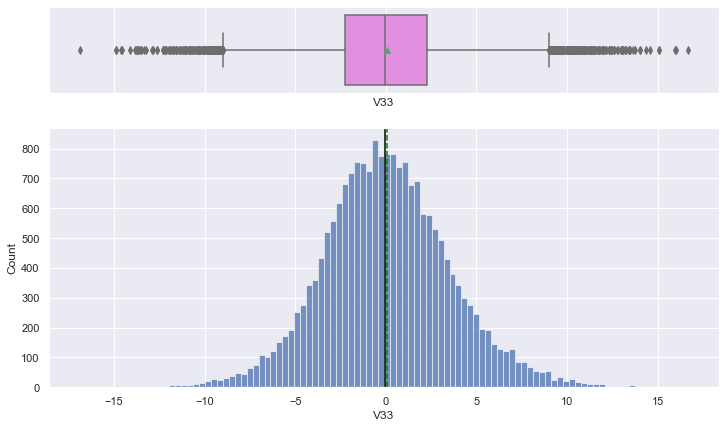

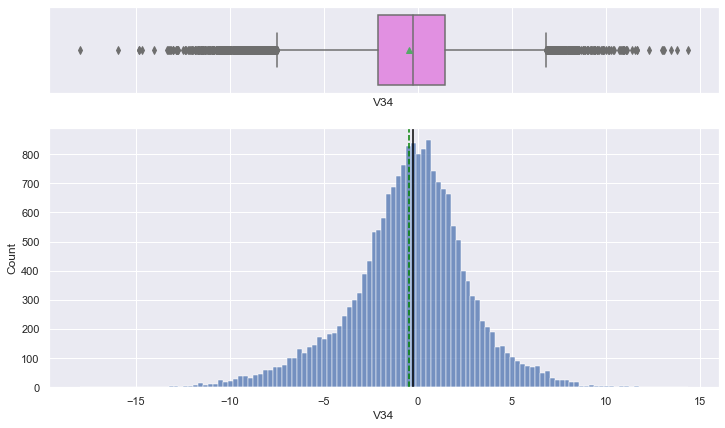

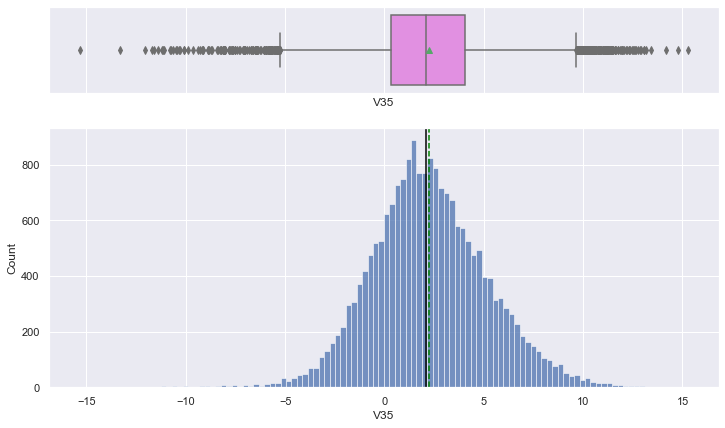

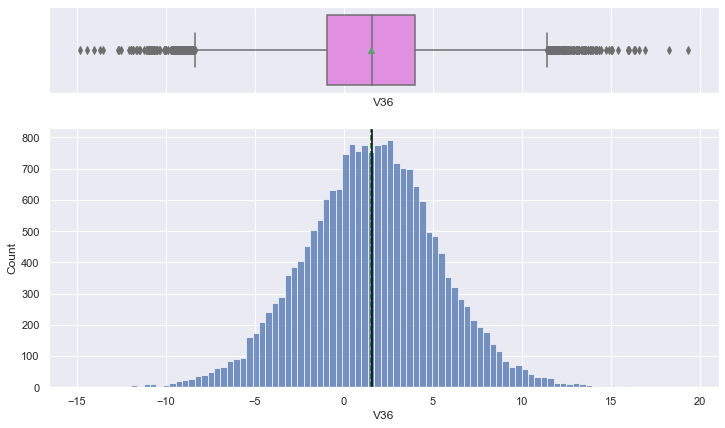

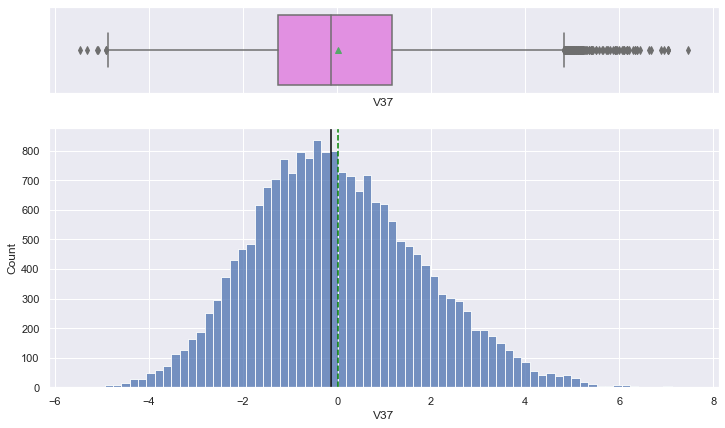

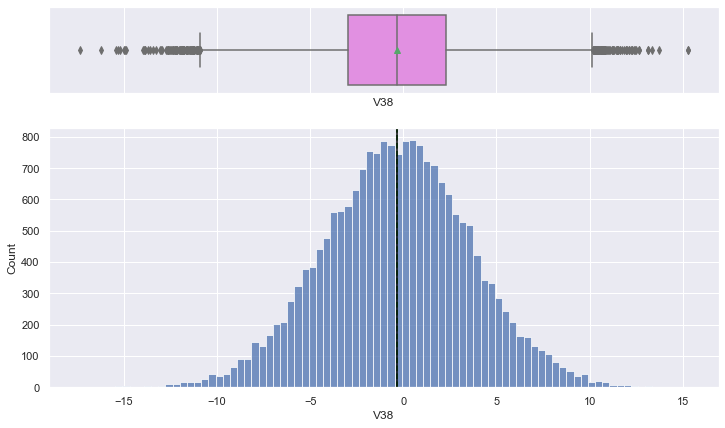

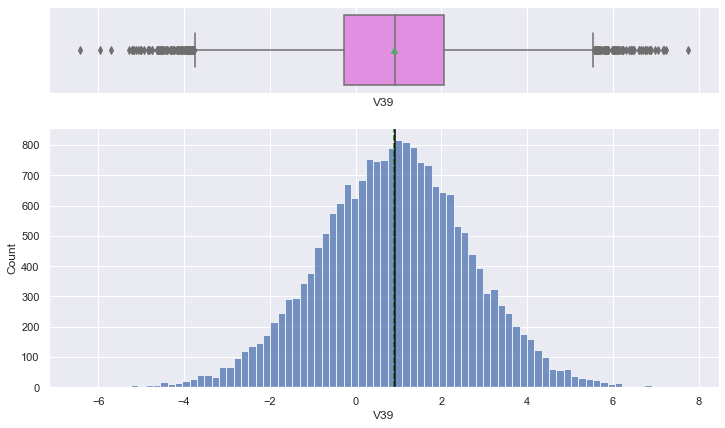

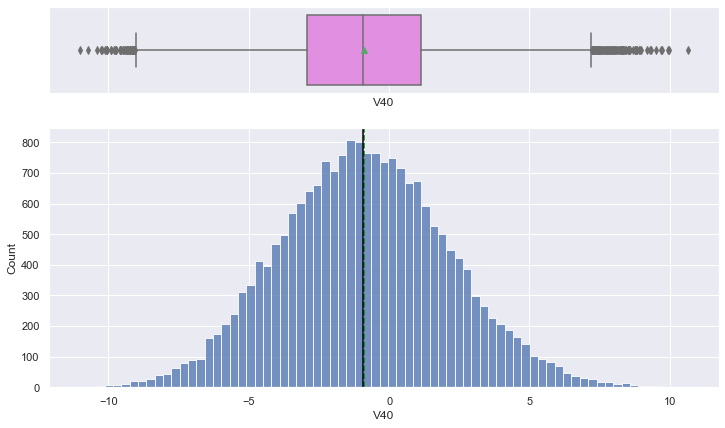

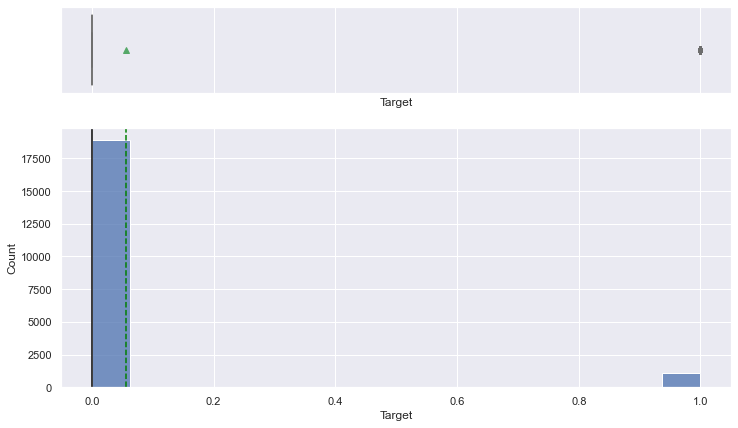

<IPython.core.display.Javascript object>

In [18]:
# Plotting all sensors features using histogram and boxplot for EDA
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

- All the sensor features show normal distribution with Bell-shaped curve
- Target variable has a large imbalance between "No failure" (0) and "failure" (1)
- There is outliers shown in all the sensors.

## Data Pre-processing

In [19]:
# Split into X=Predictor and Y=Predicted for the Training dataset
X = df.drop("Target", axis=1)
y = df["Target"]

<IPython.core.display.Javascript object>

In [20]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, Training and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=5, stratify=y
)

# Dividing test data into X_test and y_test
X_test = test_df.drop("Target", axis=1)
y_test = test_df["Target"]

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


<IPython.core.display.Javascript object>

- **Training set has 15,000 rows and 40 columns**
- **Validation set has 5,000 rows and 40 columns**
- **Test set has 5,000 rows and 40 columns**

In [21]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 50)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 50)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 50)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 50)

Target value ratio in y
0   0.945
1   0.056
Name: Target, dtype: float64
**************************************************
Target value ratio in y_train
0   0.945
1   0.055
Name: Target, dtype: float64
**************************************************
Target value ratio in y_val
0   0.944
1   0.056
Name: Target, dtype: float64
**************************************************
Target value ratio in y_test
0   0.944
1   0.056
Name: Target, dtype: float64
**************************************************


<IPython.core.display.Javascript object>

- **The ratio of Target variables for whole data, train set, validation set, and test set is balanced.**

## Missing value imputation




In [22]:
# Using SimpleImputer to create an instace for strategy median
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [23]:
# Fit and transform the train dataset
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Fit and Transform the validation dataset
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)

# Fit and Transform the test dataset
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [24]:
# Checking that there is no missing data in all columns for Training, Validation, and Test dataset.
print(X_train.isna().sum())
print("*" * 50)
print(X_val.isna().sum())
print("*" * 50)
print(X_test.isna().sum())
print("*" * 50)

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
**************************************************
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
**************************************************
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0

<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [26]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

# Model Building with original data

In [27]:
# Empty list to store all the models
models = []

# Appending models into the list
models.append(("LogisticRegression", LogisticRegression(random_state=1)))
models.append(("DecisionTree", DecisionTreeClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

# Empty list to store all model's CV scores
results1 = []

# Empty list to store name of the models
names = []

# loop through all models to get the mean cross validated score
print("\n" "\033[1m" + "Cross-Validation performance on training dataset:" + "\033[0m")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("     {}: {}".format(name, cv_result.mean()))

print("\n" "\033[1m" + "Validation Performance:" + "\033[0m")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("     {}: {}".format(name, scores))


Cross-Validation performance on training dataset:
     LogisticRegression: 0.48191328186999505
     DecisionTree: 0.6958300266936008
     RandomForest: 0.7259505086213116
     Bagging: 0.6946540653632495
     AdaBoost: 0.6130077195007575
     GradientBoosting: 0.717552846114999
     XGBoost: 0.806471394560277

Validation Performance:
     LogisticRegression: 0.5215827338129496
     DecisionTree: 0.737410071942446
     RandomForest: 0.7338129496402878
     Bagging: 0.7302158273381295
     AdaBoost: 0.6258992805755396
     GradientBoosting: 0.737410071942446
     XGBoost: 0.8309352517985612


<IPython.core.display.Javascript object>

- **The best model so far is the XGB Classifier (Extreme Gradient Boosting) and it is not overfitting the training dataset.  The metric which will ensure that the maximum number of generator failures are predicted correctly by the model is Recall.  Recall is used because we want to minimize false negatives.  This will help in maintenance cost.**

# Model Building with Oversampled data


In [28]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [29]:
# Printing Target counts Before OverSampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Printing Target counts After OverSampling
print("After Oversampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

# Printing Target shape After OverSampling
print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After Oversampling, counts of label '1': 14168
After Oversampling, counts of label '0': 14168 

After Oversampling, the shape of train_X: (28336, 40)
After Oversampling, the shape of train_y: (28336,) 



<IPython.core.display.Javascript object>

In [30]:
# Empty list to store all the models
models = []

# Appending models into the list
models.append(("LogisticRegression_over", LogisticRegression(random_state=1)))
models.append(("DecisionTree_over", DecisionTreeClassifier(random_state=1)))
models.append(("RandomForest_over", RandomForestClassifier(random_state=1)))
models.append(("Bagging_over", BaggingClassifier(random_state=1)))
models.append(("AdaBoost_over", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting_over", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost_over", XGBClassifier(random_state=1, eval_metric="logloss")))

# Empty list to store all model's CV scores
results1 = []

# Empty list to store name of the models
names = []

# loop through all models to get the mean cross validated score
print("\n" "\033[1m" + "Cross-Validation performance on training dataset:" + "\033[0m")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("     {}: {}".format(name, cv_result.mean()))

print("\n" "\033[1m" + "Validation Performance:" + "\033[0m")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("     {}: {}".format(name, scores))


Cross-Validation performance on training dataset:
     LogisticRegression_over: 0.8728826829475477
     DecisionTree_over: 0.9696496403786308
     RandomForest_over: 0.9814373445736445
     Bagging_over: 0.9767787451103676
     AdaBoost_over: 0.888128969965581
     GradientBoosting_over: 0.9160082264649343
     XGBoost_over: 0.9902598695035151

Validation Performance:
     LogisticRegression_over: 0.8705035971223022
     DecisionTree_over: 0.7985611510791367
     RandomForest_over: 0.8633093525179856
     Bagging_over: 0.8057553956834532
     AdaBoost_over: 0.8633093525179856
     GradientBoosting_over: 0.8920863309352518
     XGBoost_over: 0.8812949640287769


<IPython.core.display.Javascript object>

- **XGB Classifier (Extreme Gradient Boosting) is now overfitting the training dataset.  The best model so far is the GradientBoosting_over and is not overfitting the training dataset.  The metric which will ensure that the maximum number of generator failures are predicted correctly by the model is Recall.  Recall is used because we want to minimize false negatives.  This will help in maintenance cost.**

# Model Building with Undersampled data

In [31]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [32]:
# Printing Target counts Before UnderSampling
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Printing Target counts After UnderSampling
print("After Undersampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

# Printing Target shape After UnderSampling
print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After Undersampling, counts of label '1': 832
After Undersampling, counts of label '0': 832 

After Undersampling, the shape of train_X: (1664, 40)
After Undersampling, the shape of train_y: (1664,) 



<IPython.core.display.Javascript object>

In [33]:
# Empty list to store all the models
models = []

# Appending models into the list
models.append(("LogisticRegression_under", LogisticRegression(random_state=1)))
models.append(("DecisionTree_under", DecisionTreeClassifier(random_state=1)))
models.append(("RandomForest_under", RandomForestClassifier(random_state=1)))
models.append(("Bagging_under", BaggingClassifier(random_state=1)))
models.append(("AdaBoost_under", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting_under", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost_under", XGBClassifier(random_state=1, eval_metric="logloss")))

# Empty list to store all model's CV scores
results1 = []

# Empty list to store name of the models
names = []

# loop through all models to get the mean cross validated score
print("\n" "\033[1m" + "Cross-Validation performance on training dataset:" + "\033[0m")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("     {}: {}".format(name, cv_result.mean()))

print("\n" "\033[1m" + "Validation Performance:" + "\033[0m")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("     {}: {}".format(name, scores))


Cross-Validation performance on training dataset:
     LogisticRegression_under: 0.8581992641223577
     DecisionTree_under: 0.8594185123728446
     RandomForest_under: 0.8882476011831757
     Bagging_under: 0.8594401558329124
     AdaBoost_under: 0.8810403289805929
     GradientBoosting_under: 0.8822379337710121
     XGBoost_under: 0.8954548733857587

Validation Performance:
     LogisticRegression_under: 0.8741007194244604
     DecisionTree_under: 0.841726618705036
     RandomForest_under: 0.9028776978417267
     Bagging_under: 0.8705035971223022
     AdaBoost_under: 0.8812949640287769
     GradientBoosting_under: 0.9064748201438849
     XGBoost_under: 0.9172661870503597


<IPython.core.display.Javascript object>

- **The best model is the XGB Classifier (Extreme Gradient Boosting) using Under Sampling and it is not overfitting the training dataset.  The metric which will ensure that the maximum number of generator failures are predicted correctly by the model is Recall.  Recall is used because we want to minimize false negatives.  This will help in maintenance cost.**

# HyperparameterTuning 

## The best models that we will use for hyperparameter tuning is:

- **XGB_under**
- **GradientBoosting_under**
- **AdaBoost_under**
- **RandomForest_under**
- **XGB_over**
- **GradientBoosting_over**

- **The reason for the model choices is because the models are generalizing well and not overfitting the Training dataset when comparing results with validation data.  The models should perform great on unseen data in the Test.  The models also have the highest Recall scores.  The metric which will ensure that the maximum number of generator failures are predicted correctly by the model is Recall. Recall is used because we want to minimize false negatives. This will help in maintenance cost.** 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## XGBoost Model using UnderSampled data:

In [34]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the best combination of parameters to tuned model
XGBoost_under_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_under_tuned.fit(X_train_un, y_train_un)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.9182670802972368:


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking XGBoost tuned model performance on training dataset (UnderSampled)

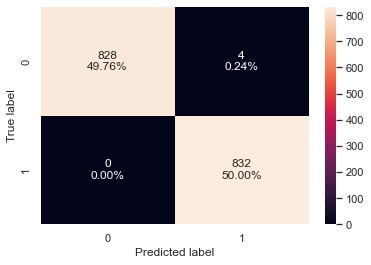

<IPython.core.display.Javascript object>

In [35]:
# Showing the confusion matrix on the XGBoost tuned model
confusion_matrix_sklearn(XGBoost_under_tuned, X_train_un, y_train_un)

In [36]:
# Show model performance on the XGBoost tuned model
XGBoost_under_tuned_model_train_perf = model_performance_classification_sklearn(
    XGBoost_under_tuned, X_train_un, y_train_un
)
XGBoost_under_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998,1.000,0.995,0.998


<IPython.core.display.Javascript object>

### Checking XGBoost tuned model performance on validation dataset (UnderSampled)

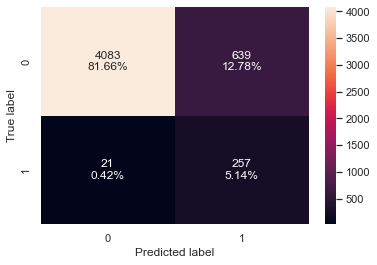

<IPython.core.display.Javascript object>

In [37]:
# Showing the confusion matrix on the XGBoost tuned model
confusion_matrix_sklearn(XGBoost_under_tuned, X_val, y_val)

In [38]:
# Show model performance on the XGBoost tuned model
XGBoost_under_tuned_model_val_perf = model_performance_classification_sklearn(
    XGBoost_under_tuned, X_val, y_val
)
XGBoost_under_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.868,0.924,0.287,0.438


<IPython.core.display.Javascript object>

- **Tuned XGBoost model is overfitting the Training dataset**

## GradientBoosting Model using UnderSampled data:

In [39]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the best combination of parameters to tuned model
GradientBoosting_under_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
GradientBoosting_under_tuned.fit(X_train_un, y_train_un)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.8942284106485824:


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

### Checking GradientBoosting tuned model performance on training dataset (UnderSampled)

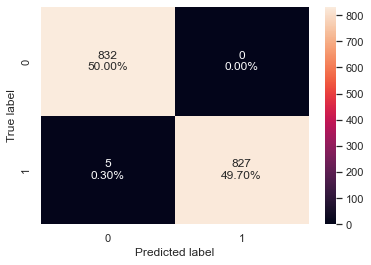

<IPython.core.display.Javascript object>

In [40]:
# Showing the confusion matrix on the GradientBoosting tuned model
confusion_matrix_sklearn(GradientBoosting_under_tuned, X_train_un, y_train_un)

In [41]:
# Show model performance on the GradientBoosting tuned model
GradientBoosting_under_tuned_model_train_perf = model_performance_classification_sklearn(
    GradientBoosting_under_tuned, X_train_un, y_train_un
)
GradientBoosting_under_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.997,0.994,1.000,0.997


<IPython.core.display.Javascript object>

### Checking GradientBoosting tuned model performance on validation dataset (UnderSampled)

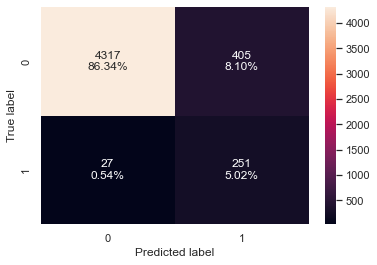

<IPython.core.display.Javascript object>

In [42]:
# Showing the confusion matrix on the GradientBoosting tuned model
confusion_matrix_sklearn(GradientBoosting_under_tuned, X_val, y_val)

In [43]:
# Show model performance on the GradientBoosting tuned model
GradientBoosting_under_tuned_model_val_perf = model_performance_classification_sklearn(
    GradientBoosting_under_tuned, X_val, y_val
)
GradientBoosting_under_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.914,0.903,0.383,0.537


<IPython.core.display.Javascript object>

- **Tuned GradientBoosting model is overfitting the Training dataset**

## AdaBoost Model using UnderSampled data:

In [44]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the best combination of parameters to tuned model
AdaBoost_under_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
AdaBoost_under_tuned.fit(X_train_un, y_train_un)

Best parameters are {'n_estimators': 150, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.884618714378472:


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=150, random_state=1)

<IPython.core.display.Javascript object>

### Checking AdaBoost tuned model performance on training dataset

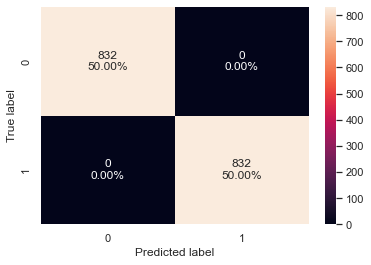

<IPython.core.display.Javascript object>

In [45]:
# Showing the confusion matrix on the AdaBoost tuned model
confusion_matrix_sklearn(AdaBoost_under_tuned, X_train_un, y_train_un)

In [46]:
# Show model performance on the AdaBoost tuned model
AdaBoost_under_tuned_model_train_perf = model_performance_classification_sklearn(
    AdaBoost_under_tuned, X_train_un, y_train_un
)
AdaBoost_under_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

### Checking AdaBoost tuned model performance on validation dataset

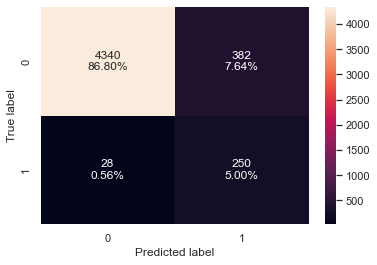

<IPython.core.display.Javascript object>

In [47]:
# Showing the confusion matrix on the AdaBoost tuned model
confusion_matrix_sklearn(AdaBoost_under_tuned, X_val, y_val)

In [48]:
# Show model performance on the AdaBoost tuned model
AdaBoost_under_tuned_model_val_perf = model_performance_classification_sklearn(
    AdaBoost_under_tuned, X_val, y_val
)
AdaBoost_under_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.918,0.899,0.396,0.549


<IPython.core.display.Javascript object>

- **Tuned AdaBoost model is overfitting the Training dataset**

## RandomForest Model using UnderSampled data:

In [49]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the best combination of parameters to tuned model
RandomForest_under_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
RandomForest_under_tuned.fit(X_train_un, y_train_un)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8930163768847846:


RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

### Checking RandomForest tuned model performance on training dataset

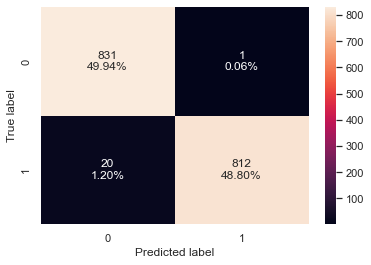

<IPython.core.display.Javascript object>

In [50]:
# Showing the confusion matrix on the RandomForest tuned model
confusion_matrix_sklearn(RandomForest_under_tuned, X_train_un, y_train_un)

In [51]:
# Show model performance on the RandomForest tuned model
RandomForest_under_tuned_model_train_perf = model_performance_classification_sklearn(
    RandomForest_under_tuned, X_train_un, y_train_un
)
RandomForest_under_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.987,0.976,0.999,0.987


<IPython.core.display.Javascript object>

### Checking RandomForest tuned model performance on validation dataset

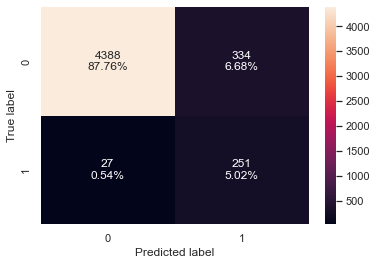

<IPython.core.display.Javascript object>

In [52]:
# Showing the confusion matrix on the RandomForest tuned model
confusion_matrix_sklearn(RandomForest_under_tuned, X_val, y_val)

In [53]:
# Show model performance on the RandomForest tuned model
RandomForest_under_tuned_model_val_perf = model_performance_classification_sklearn(
    RandomForest_under_tuned, X_val, y_val
)
RandomForest_under_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.928,0.903,0.429,0.582


<IPython.core.display.Javascript object>

- **Tuned RandomForest model is overfitting the Training dataset but not as bad as other models.**

## XGBoost Model using OverSampled data:

In [54]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the best combination of parameters to tuned model
XGBoost_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_over_tuned.fit(X_train_over, y_train_over)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9952711029227317:


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking XGBoost tuned model performance on training dataset (OverSampled)

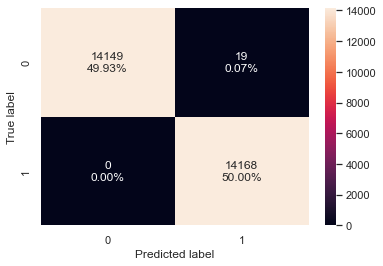

<IPython.core.display.Javascript object>

In [55]:
# Showing the confusion matrix on the XGBoost tuned model
confusion_matrix_sklearn(XGBoost_over_tuned, X_train_over, y_train_over)

In [56]:
# Show model performance on the XGBoost tuned model
XGBoost_over_tuned_model_train_perf = model_performance_classification_sklearn(
    XGBoost_over_tuned, X_train_over, y_train_over
)
XGBoost_over_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.999,0.999


<IPython.core.display.Javascript object>

### Checking XGBoost tuned model performance on validation dataset (OverSampled)

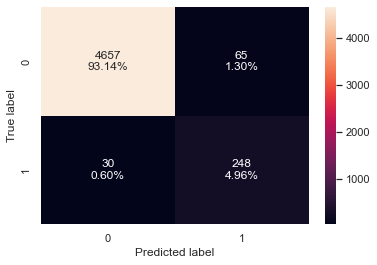

<IPython.core.display.Javascript object>

In [57]:
# Showing the confusion matrix on the XGBoost tuned model
confusion_matrix_sklearn(XGBoost_over_tuned, X_val, y_val)

In [58]:
# Show model performance on the XGBoost tuned model
XGBoost_over_tuned_model_val_perf = model_performance_classification_sklearn(
    XGBoost_over_tuned, X_val, y_val
)
XGBoost_over_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.981,0.892,0.792,0.839


<IPython.core.display.Javascript object>

- **This model is the best of all the hyperparameter tuned models but still overfits Training dataset.**

## GradientBoosting Model using OverSampled data:

In [59]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the best combination of parameters to tuned model
GradientBoosting_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
GradientBoosting_over_tuned.fit(X_train_over, y_train_over)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9676031129238252:


GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

### Checking GradientBoosting tuned model performance on training dataset (OverSampled)

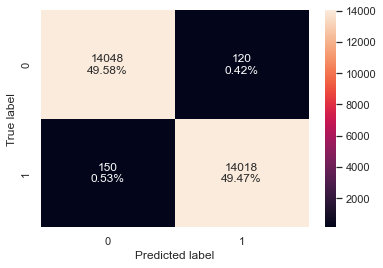

<IPython.core.display.Javascript object>

In [60]:
# Showing the confusion matrix on the GradientBoosting tuned model
confusion_matrix_sklearn(GradientBoosting_over_tuned, X_train_over, y_train_over)

In [61]:
# Show model performance on the GradientBoosting tuned model
GradientBoosting_over_tuned_model_train_perf = model_performance_classification_sklearn(
    GradientBoosting_over_tuned, X_train_over, y_train_over
)
GradientBoosting_over_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.990,0.989,0.992,0.990


<IPython.core.display.Javascript object>

### Checking GradientBoosting tuned model performance on validation dataset (OverSampled)

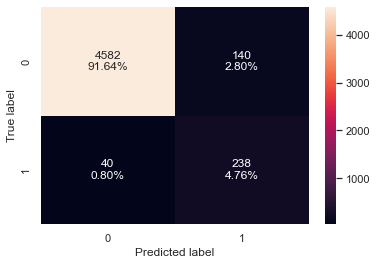

<IPython.core.display.Javascript object>

In [62]:
# Showing the confusion matrix on the GradientBoosting tuned model
confusion_matrix_sklearn(GradientBoosting_over_tuned, X_val, y_val)

In [63]:
# Show model performance on the GradientBoosting tuned model
GradientBoosting_over_tuned_model_val_perf = model_performance_classification_sklearn(
    GradientBoosting_over_tuned, X_val, y_val
)
GradientBoosting_over_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.964,0.856,0.630,0.726


<IPython.core.display.Javascript object>

- **Tuned GradientBoosting model is overfitting the Training dataset using OverSampled.**

## Model performance comparison and choosing the final model

In [64]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        XGBoost_under_tuned_model_train_perf.T,
        GradientBoosting_under_tuned_model_train_perf.T,
        AdaBoost_under_tuned_model_train_perf.T,
        RandomForest_under_tuned_model_train_perf.T,
        XGBoost_over_tuned_model_train_perf.T,
        GradientBoosting_over_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost UnderSampled tuned",
    "Gradient Boosting UnderSampled tuned",
    "AdaBoost UnderSampled tuned",
    "Random Forest UnderSampled tuned",
    "XGBoost OverSampled tuned",
    "Gradient Boosting OverSampled tuned",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost UnderSampled tuned,Gradient Boosting UnderSampled tuned,AdaBoost UnderSampled tuned,Random Forest UnderSampled tuned,XGBoost OverSampled tuned,Gradient Boosting OverSampled tuned
Accuracy,0.998,0.997,1.000,0.987,0.999,0.990
Recall,1.000,0.994,1.000,0.976,1.000,0.989
Precision,0.995,1.000,1.000,0.999,0.999,0.992
F1,0.998,0.997,1.000,0.987,0.999,0.990


<IPython.core.display.Javascript object>

In [65]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        XGBoost_under_tuned_model_val_perf.T,
        GradientBoosting_under_tuned_model_val_perf.T,
        AdaBoost_under_tuned_model_val_perf.T,
        RandomForest_under_tuned_model_val_perf.T,
        XGBoost_over_tuned_model_val_perf.T,
        GradientBoosting_over_tuned_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost UnderSampled tuned",
    "Gradient Boosting UnderSampled tuned",
    "AdaBoost UnderSampled tuned",
    "Random Forest UnderSampled tuned",
    "XGBoost OverSampled tuned",
    "Gradient Boosting OverSampled tuned",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost UnderSampled tuned,Gradient Boosting UnderSampled tuned,AdaBoost UnderSampled tuned,Random Forest UnderSampled tuned,XGBoost OverSampled tuned,Gradient Boosting OverSampled tuned
Accuracy,0.868,0.914,0.918,0.928,0.981,0.964
Recall,0.924,0.903,0.899,0.903,0.892,0.856
Precision,0.287,0.383,0.396,0.429,0.792,0.630
F1,0.438,0.537,0.549,0.582,0.839,0.726


<IPython.core.display.Javascript object>

- **The best model is the XGBoost tuned model using OverSampled data.  The Accuracy is the highest at 98.1% and Recall is good at 89.2% which compares to other model Recall scores but the Precision is also great at 79.2% which will save on inspection costs as well as maintenance cost.  We will use XGBoost tuned OverSampled model in our final model.** 


## Test set final performance

### Checking XGBoost tuned model performance on Test dataset (OverSampled)

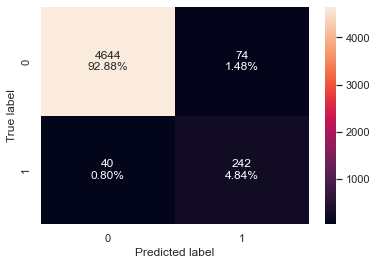

<IPython.core.display.Javascript object>

In [66]:
# Showing the confusion matrix on the XGBoost tuned model on Test dataset
confusion_matrix_sklearn(XGBoost_over_tuned, X_test, y_test)

In [67]:
# Show model performance on the XGBoost tuned model on Test dataset
XGBoost_over_tuned_model_test_perf = model_performance_classification_sklearn(
    XGBoost_over_tuned, X_test, y_test
)
XGBoost_over_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.977,0.858,0.766,0.809


<IPython.core.display.Javascript object>

### Feature Importance of Tuned XGBoost Model (OverSampled)

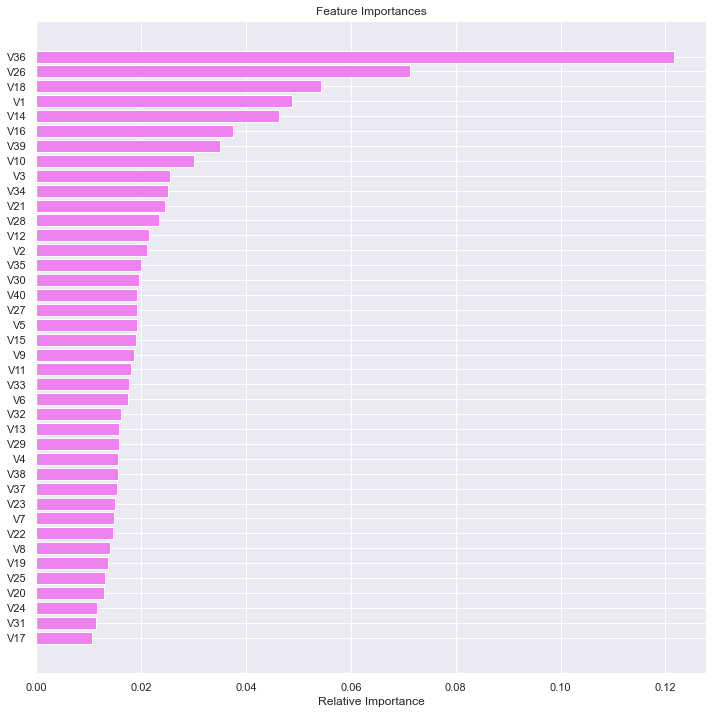

<IPython.core.display.Javascript object>

In [68]:
# Create chart showing the order of most important features for the Tuned XGBoost
feature_names = X_test.columns
importances = XGBoost_over_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- **The models performance on the Test dataset is similar to that of the validation dataset.  Model will save on both inspection costs as well as maintenance cost.  Recall is still good at 85.8% and Accuracy is at 97.7%.  This is the model we will Productionize using pipelines.**
- **The most important sensors are: V36, V26, V18, V1 and V14.**

## Pipelines to build the final model


In [69]:
# Creating new pipeline with best model with best parameters
pipeline_XGB = Pipeline(
    [
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                subsample=0.8,
                scale_pos_weight=10,
                n_estimators=250,
                learning_rate=0.1,
                gamma=0,
                eval_metric="logloss",
            ),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [70]:
# Split into X=Predictor and Y=Predicted for the Training dataset
X2 = df.drop("Target", axis=1)
y2 = df["Target"]

<IPython.core.display.Javascript object>

In [71]:
# Dividing test data into X_test and y_test
X_test2 = test_df.drop("Target", axis=1)
y_test2 = test_df["Target"]

<IPython.core.display.Javascript object>

In [72]:
# creating a transformer for all numerical variables, which will apply simple imputer on the numerical variables
imputer = SimpleImputer(strategy="median")
X2 = imputer.fit_transform(X2)

<IPython.core.display.Javascript object>

In [73]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over, y_over = sm.fit_resample(X2, y2)

<IPython.core.display.Javascript object>

In [74]:
# now the pipeline object can be used as a normal classifier
pipeline_XGB.fit(X_over, y_over)

Pipeline(steps=[('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=250, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=1, reg_alpha=0,
                               reg_lambda=1, ...))])

<IPython.core.display.Javascript object>

# Pipeline performance on test dataset

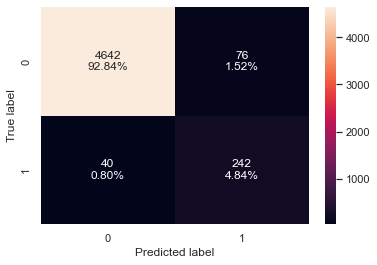

<IPython.core.display.Javascript object>

In [75]:
# Showing the confusion matrix on the pipeline XGB model
confusion_matrix_sklearn(pipeline_XGB, X_test2, y_test2)

In [76]:
# Show model performance on the pipeline XGB model
pipeline_model_perf = model_performance_classification_sklearn(
    pipeline_XGB, X_test2, y_test2
)
pipeline_model_perf

,Accuracy,Recall,Precision,F1
0,0.977,0.858,0.761,0.807


<IPython.core.display.Javascript object>

- **Now the pipeline object can be used as a normal classifier with best parameters which will apply simple imputer on the numerical test variables inside pipeline.**

# Business Insights and Conclusions

- The best model is the XGBoost tuned model using OverSampled data.  The Accuracy is high on testing data at 97.7% and Recall is good at 85.8% which compares to other model Recall scores but the Precision is also great at 76.1% which will save on inspection costs as well as maintenance cost. The final model was productionize using pipelines.
- The most important metrics is Recall and the final model was tuned for high recall scores.
- Recall is the False Negatives that are real failures where there is no detection by the model and are the most expensive that requires replacement costs and down time.
- True Positives are failures correctly predicted by the model which will result in preventive repair/maintenance costs.
- Precision is the False Positives where there is no failure and will result in inspection costs and sensor replacements.
- The most important sensors are: V36, V26, V18, V1 and V14 to predict failures in the wind turbines.
- I recommend that ReneWind keep replacement parts ready in case of failure to avoid wind turbine down time.
- I recommend that routine maintenance be required every six months.
- The most common wind turbine failures is due to uncontrolled levels of humidity present inside the wind turbine.  I recommend that the inside be sealed to keep moist air out.
- Common external problem for wind turbines are bird strikes.  I recommend painting the blades black which can help to deter birds from colliding with the wind turbine blades.